<a href="https://colab.research.google.com/github/OmdenaAI/omdena-munich-chapter-deepfakes-detection/blob/main/src/tasks/task-4-model-training/Mussie_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import os
import numpy as np
import numpy as np
import pandas as pd
from PIL import Image
from google.colab import drive
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
# drive.mount('/content/drive')

# Steps

1) extracted all zip files into temportary directories
2) loaded them in PyTorch for reproducible results
3) transfer learned using a pretrained AlexNet model in PyTorch

PyTorch has been chosen for the ease of reproducible data access and availability of a pretrained AlexNet model

## zip folder extraction - only run once

In [ ]:
#unzipping keras train files for deepfake images

# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Deepfake/attgan_aug_train.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Deepfake/gdwct_Aug_Train.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Deepfake/stargan_Aug_Train.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Deepfake/stylegan2_Aug_Train.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Deepfake/stylegan_aug_Train.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Deepfake/stargan_Aug_Train.zip
   creating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train/
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train/stargan_aug_3900_0_9922.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train/stargan_aug_3096_0_1310.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train/stargan_aug_2988_0_8131.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train/stargan_aug_516_0_5547.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train/stargan_aug_480_0_5367.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake

In [ ]:
# #unzipping keras train files for real images

# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Real/celebA_Aug_Train.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Train_Data/Real/ffhq_Aug_Train.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/ffhq_aug_7368_0_9333.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/ffhq_aug_465_0_5818.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/ffhq_aug_2034_0_8733.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/ffhq_aug_4125_0_7573.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/ffhq_aug_7419_0_7125.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/ffhq_aug_8541_0_5713.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/ffhq_aug_5787_0_5047.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_u

In [ ]:
# #unzipping keras validation files for deepfake images

# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Deepfake/attgan_aug_val.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Deepfake/gdwct_Aug_Val.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Deepfake/stargan_Aug_Val.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Deepfake/stylegan2_Aug_Val.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Deepfake/stylegan_aug_Val.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Deepfake/attgan_aug_val.zip
   creating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val/
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val/attgan_aug_2316_0_8640.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val/attgan_aug_4866_0_8595.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val/attgan_aug_3246_0_8626.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val/attgan_aug_2268_0_6889.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val/attgan_aug_18_0_5358.jpg  
  inflating: /content/drive/MyDrive/Omdeena

In [ ]:
# #unzipping keras validation files for deepfake images

# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Real/celebA_Aug_Val.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Real/ffhq_Aug_Val.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Validation_Data/Real/ffhq_Aug_Val.zip
   creating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val/
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val/ffhq_aug_7116_0_3362.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val/ffhq_aug_14010_0_37.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val/ffhq_aug_10533_0_5956.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val/ffhq_aug_11613_0_5281.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val/ffhq_aug_7299_0_7834.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/f

In [ ]:
# #unzipping keras test files for deepfake images

# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Deepfake/attgan_aug_test.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Deepfake/gdwct_Aug_Test.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Deepfake/stargan_Aug_Test.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Deepfake/stylegan2_Aug_Test.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Deepfake/stylegan_aug_Test.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Deepfake/attgan_aug_test.zip
   creating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test/
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test/attgan_aug_3408_0_3215.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test/attgan_aug_1434_0_2097.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test/attgan_aug_2718_0_4015.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test/attgan_aug_4764_0_7825.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test/attgan_aug_1584_0_5074.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deep

In [ ]:
# #unzipping keras test files for real images

# # !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Real/celebA_Aug_Test.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/
# !unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Real/ffhq_Aug_Test.zip -d /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Keras_Data/Test_Data/Real/ffhq_Aug_Test.zip
   creating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/ffhq_aug_4332_0_9828.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/ffhq_aug_615_0_2754.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/ffhq_aug_12690_0_243.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/ffhq_aug_3444_0_3921.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/ffhq_aug_12438_0_2912.jpg  
  inflating: /content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/ffhq_aug_879_0_3768.jpg  
  i

## form the datasets

In [ ]:
# ## training data folders

# attgan_train = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/attgan_aug_train/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/attgan_aug_train/')]
# gdwct_train = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/gdwct_Aug_Train/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/gdwct_Aug_Train')]
# stargan_train = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train')]
# stylegan2_train = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stylegan2_Aug_Train/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stylegan2_Aug_Train')]
# stylegan_train = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stylegan_aug_Train/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stylegan_aug_Train')]

# celebA_train = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/celebA_Aug_Train/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/celebA_Aug_Train')]
# ffhq_train = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Real/content/ffhq_Aug_Train')]

# ## validation data folders

# attgan_val = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/attgan_aug_val')]
# gdwct_val = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/gdwct_Aug_Val/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/gdwct_Aug_Val')]
# stargan_val = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/stargan_Aug_Val/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/stargan_Aug_Val')]
# stylegan2_val = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/stylegan2_Aug_Val/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/stylegan2_Aug_Val')]
# stylegan_val = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/stylegan_aug_Val/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Deepfake/content/stylegan_aug_Val')]

# celebA_val = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/celebA_Aug_Val/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/celebA_Aug_Val')]
# ffhq_val = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val')]

# ## test data folders

# attgan_test = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test')]
# gdwct_test = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/gdwct_Aug_Test/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/gdwct_Aug_Test')]
# stargan_test = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/stargan_Aug_Test/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/stargan_Aug_Test')]
# stylegan2_test = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/stylegan2_Aug_Test/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/stylegan2_Aug_Test')]
# stylegan_test = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/stylegan_aug_Test/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/stylegan_aug_Test')]

# celebA_test = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/celebA_Aug_Test/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/celebA_Aug_Test')]
# ffhq_test = [np.array(Image.open(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test/{file}')) for file in os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/ffhq_Aug_Test')]

In [ ]:
# ## first check some assertions

# assert len(attgan_test) == len(os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Deepfake/content/attgan_aug_test'))
# assert len(celebA_test) == len(os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Test_Data/Real/content/celebA_Aug_Test'))
# assert len(ffhq_val) == len(os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Validation_Data/Real/content/ffhq_Aug_Val'))
# assert len(stargan_train) == len(os.listdir('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Train_Data/Deepfake/content/stargan_Aug_Train'))

In [ ]:
# ## store image arrays in dataframes for future use

# ## train
# pd.DataFrame({'samples':[attgan_train]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/attgan_train.pkl')
# pd.DataFrame({'samples':[gdwct_train]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/gdwct_train.pkl')
# pd.DataFrame({'samples':[stargan_train]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stargan_train.pkl')
# pd.DataFrame({'samples':[stylegan2_train]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan2_train.pkl')
# pd.DataFrame({'samples':[stylegan_train]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan_train.pkl')
# pd.DataFrame({'samples':[celebA_train]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/celebA_train.pkl')
# pd.DataFrame({'samples':[ffhq_train]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/ffhq_train.pkl')

# ## validation
# pd.DataFrame({'samples':[attgan_val]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/attgan_val.pkl')
# pd.DataFrame({'samples':[gdwct_val]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/gdwct_val.pkl')
# pd.DataFrame({'samples':[stargan_val]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stargan_val.pkl')
# pd.DataFrame({'samples':[stylegan2_val]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan2_val.pkl')
# pd.DataFrame({'samples':[stylegan_val]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan_val.pkl')
# pd.DataFrame({'samples':[celebA_val]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/celebA_val.pkl')
# pd.DataFrame({'samples':[ffhq_val]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/ffhq_val.pkl')

# ## test
# pd.DataFrame({'samples':[attgan_test]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/attgan_test.pkl')
# pd.DataFrame({'samples':[gdwct_test]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/gdwct_test.pkl')
# pd.DataFrame({'samples':[stargan_test]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stargan_test.pkl')
# pd.DataFrame({'samples':[stylegan2_test]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan2_test.pkl')
# pd.DataFrame({'samples':[stylegan_test]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan_test.pkl')
# pd.DataFrame({'samples':[celebA_test]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/celebA_test.pkl')
# pd.DataFrame({'samples':[ffhq_test]}).to_pickle(f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/ffhq_test.pkl')

## Modelling

In [2]:
import pandas as pd
## read dataframes
# train
attgan_train=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/attgan_train.pkl')
gdwct_train=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/gdwct_train.pkl')
stargan_train=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stargan_train.pkl')
stylegan2_train=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan2_train.pkl')
stylegan_train=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan_train.pkl')
celebA_train=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/celebA_train.pkl')
ffhq_train=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/ffhq_train.pkl')

#val
attgan_val=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/attgan_val.pkl')
gdwct_val=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/gdwct_val.pkl')
stargan_val=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stargan_val.pkl')
stylegan2_val=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan2_val.pkl')
stylegan_val=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan_val.pkl')
celebA_val=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/celebA_val.pkl')
ffhq_val=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/ffhq_val.pkl')

#test
attgan_test=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/attgan_test.pkl')
gdwct_test=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/gdwct_test.pkl')
stargan_test=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stargan_test.pkl')
stylegan2_test=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan2_test.pkl')
stylegan_test=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/stylegan_test.pkl')
celebA_test=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/celebA_test.pkl')
ffhq_test=pd.read_pickle('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/Dataframes/ffhq_test.pkl')

In [3]:
len(attgan_train['samples'][0])

4802

In [ ]:
# for i in [attgan_val,gdwct_val,stargan_val,stylegan2_val,stylegan_val, celebA_val, ffhq_val]:
#   print(len(i))

In [4]:
import random

random.seed(0) ### results should be reproducible only if you run it once

## train samples
# deepfake
attgan_train=random.sample(attgan_train['samples'][0], 1000)
gdwct_train=random.sample(gdwct_train['samples'][0], 1000)
stargan_train=random.sample(stargan_train['samples'][0], 1000)
stylegan2_train=random.sample(stylegan2_train['samples'][0], 1000)
stylegan_train=random.sample(stylegan_train['samples'][0], 1000)

# real
celebA_train=random.sample(celebA_train['samples'][0], 2500)
ffhq_train=random.sample(ffhq_train['samples'][0], 2500)

## validation samples 
# deepfake
attgan_val=random.sample(attgan_val['samples'][0], 500)
gdwct_val=random.sample(gdwct_val['samples'][0], 500)
stargan_val=random.sample(stargan_val['samples'][0], 500)
stylegan2_val=random.sample(stylegan2_val['samples'][0], 500)
stylegan_val=random.sample(stylegan_val['samples'][0], 500)

# real
celebA_val=random.sample(celebA_val['samples'][0], 1250)
ffhq_val=random.sample(ffhq_val['samples'][0], 1250)

## test samples
# deepfake
attgan_test=random.sample(attgan_test['samples'][0], 600)
gdwct_test=random.sample(gdwct_test['samples'][0], 600)
stargan_test=random.sample(stargan_test['samples'][0], 600)
stylegan2_test=random.sample(stylegan2_test['samples'][0], 600)
stylegan_test=random.sample(stylegan_test['samples'][0], 600)

# real
celebA_test=random.sample(celebA_test['samples'][0], 1500)
ffhq_test=random.sample(ffhq_test['samples'][0], 1500)

In [5]:
## final datasets
# deepfake
deepfake_train=attgan_train+gdwct_train+stargan_train+stylegan_train+stylegan2_train
deepfake_val=attgan_val+gdwct_val+stargan_val+stylegan_val+stylegan2_val
deepfake_test=attgan_test+gdwct_test+stargan_test+stylegan_test+stylegan2_test

# real
real_train=celebA_train+ffhq_train
real_val=celebA_val+ffhq_val
real_test=celebA_test+ffhq_test

In [6]:
# manual labelling

train_data=[]
for i in range(len(deepfake_train)):
   train_data.append([deepfake_train[i], 1])
for i in range(len(real_train)):
   train_data.append([real_train[i], 0])

val_data=[]
for i in range(len(deepfake_val)):
   val_data.append([deepfake_val[i], 1])
for i in range(len(real_val)):
   val_data.append([real_val[i], 0])

test_data=[]
for i in range(len(deepfake_test)):
   test_data.append([deepfake_test[i], 1])
for i in range(len(real_test)):
   test_data.append([real_test[i], 0])

In [7]:
# shuffle data

random.shuffle(train_data)
random.shuffle(val_data)
random.shuffle(test_data)

In [8]:
train_data=np.array(train_data, dtype=object)
val_data=np.array(val_data, dtype=object)
test_data=np.array(test_data, dtype=object)

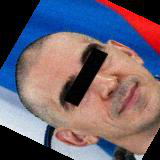

In [9]:
# check images are right
img_numpy=np.array(test_data)[:, 0][1]
img = Image.fromarray(img_numpy, "RGB")
img.show()

In [ ]:
# img_numpy.max()

In [10]:
from torchvision import transforms
# pre-processing input images before feeding into the net
# images are already the correct size
data_transforms = transforms.Compose([
    transforms.ToTensor(), # normalizes array
])

In [11]:
from torch.utils.data import Dataset
import numpy as np

class TransformedDataset(Dataset):

  def __init__(self, data, transform=None):
    data=data

    self.n_samples=data.shape[0]

    self.x=data[:,0]
    self.y=data[:,1]

    self.transform=transform

  def __getitem__(self, index):
    sample=self.x[index], self.y[index]

    if self.transform:
      img, label = self.transform(sample[0]), sample[1]
    
    return img, label

  def __len__(self):
    return self.n_samples

In [12]:
train_data_1=TransformedDataset(train_data, transform=data_transforms)
val_data_1=TransformedDataset(val_data, transform=data_transforms)
test_data_1=TransformedDataset(test_data, transform=data_transforms)

In [ ]:
# train_data_1.__getitem__(0)[0].shape # [channels, height, width]

In [ ]:
# train_data_1.__getitem__(0)[0].max()

tensor(0.9922)

In [13]:
import torch
train_loader=torch.utils.data.DataLoader(train_data_1, batch_size=64, shuffle=False)
val_loader=torch.utils.data.DataLoader(val_data_1, batch_size=64, shuffle=False)
test_loader_one=torch.utils.data.DataLoader(test_data_1, batch_size=1, shuffle=False)

In [ ]:
# len(train_loader.dataset)

In [35]:
## load alexnet model

model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
# mitigate overfitting 
# model.classifier[4] = torch.nn.Linear(4096, 1024)
model.classifier[6] = torch.nn.Linear(4096, 2) # binary classification
model.eval() # summary of model architecture

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [38]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [39]:
# check if model in gpu
print(f"model in gpu: {next(model.parameters()).is_cuda}")

model in gpu: True


In [19]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [40]:
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
class Optimization:
  def __init__(self, model, loss_fn, optimizer):
    self.model = model
    self.loss_fn = loss_fn
    self.optimizer = optimizer
    self.train_losses = []
    self.val_losses = []
  
  def train_step(self, x, y):
    # Sets model to train mode
    self.model.train()

    # Makes predictions
    yhat = self.model(x)

    # Computes loss
    loss = self.loss_fn(yhat, y)

    # Computes gradients
    loss.backward()

    # Updates parameters and resets their gradients to zero
    self.optimizer.step()
    self.optimizer.zero_grad()

    # Returns the loss
    return loss.item()
  
  def train(self, train_loader, val_loader, n_epochs=50):
      model_path = f'/content/drive/MyDrive/Omdeena_Deepfake_unzipped/AlexNet/Checkpoints'
      
      for epoch in range(1, n_epochs+1):  # loop over the dataset multiple times
        batch_losses=[]
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device).long()
            loss = self.train_step(inputs, labels)
            batch_losses.append(loss)
        # average loss per batch in the epoch
        training_loss = np.mean(batch_losses) 
        self.train_losses.append(training_loss) 

        with torch.no_grad():
          batch_val_losses = []
          for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device).float(), data[1].to(device).long()
            self.model.eval()
            yhat = self.model(inputs)
            val_loss = self.loss_fn(yhat, labels).item()
            batch_val_losses.append(val_loss)
          validation_loss = np.mean(batch_val_losses)
          self.val_losses.append(validation_loss)

        early_stopper=EarlyStopper(patience=10, min_delta=0)
        if early_stopper.early_stop(validation_loss):
          print('validation loss stopped improving')           
          break

        if (epoch <= 10) | (epoch % 10 == 0):
            print(
                f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
            )

        torch.save(self.model.state_dict(), model_path)
  
      print('Finished Training of AlexNet')

    
  def evaluate(self, test_loader):
    with torch.no_grad():
        predictions = []
        values = []
        for input, label in test_loader:
            input, label = input.to(device).float(), label.to(device).long()
            self.model.eval() # evaluation mode e.g. stop batchnorm, dropout
            yhat = self.model(input)
            predictions.append(yhat.cpu().detach().numpy()) #back to cpu to use numpy
            values.append(label.cpu().detach().numpy())

    return predictions, values

  def plot_losses(self):
      plt.plot(self.train_losses, label="Training loss")
      plt.plot(self.val_losses, label="Validation loss")
      plt.legend()
      plt.title("Losses")
      plt.show()
      plt.close()

In [ ]:
# !chmod 777 '/content/drive/MyDrive/Omdeena_Deepfake_unzipped/AlexNet/'

## Hyperparameter tuning

In [ ]:
# !pip install optuna

alter the batch size and model dense architecture afterwards

In [ ]:
# def train_and_evaluate(params, model):

#   loss_fn = nn.CrossEntropyLoss()
#   optimizer=optim.SGD(model.parameters(), lr=params['learning_rate'], momentum=params['momentum'])

#   opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
#   opt.train(train_loader, val_loader, n_epochs=params['n_epochs'])
#   predictions, values = opt.evaluate(test_loader_one)
#   probs=torch.sigmoid(torch.FloatTensor(np.array(predictions)))
#   preds=np.argmax(probs, axis=2)
#   f1=f1_score(values, preds)
#   return f1

In [ ]:
# import optuna
# import torch.optim as optim
# study=optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler()) #bayesian optimisation to maximise f1

# def callback(study, trial):
#     if study.best_trial.number == trial.number:
#         study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])

# def objective(trial):

#   params={
#       'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
#       'n_epochs':trial.suggest_int('n_epochs', 10, 70, 10),
#       'momentum':trial.suggest_uniform('momentum', 0.8, 0.99)
#   }

#   trial.set_user_attr(key="best_booster", value=model)

#   f1=train_and_evaluate(params, model)

#   return f1

In [ ]:
# study.optimize(objective, n_trials=10, callbacks=[callback])

In [ ]:
# best_trial = study.best_trial

# for key, value in best_trial.params.items():
#     print("{}: {}".format(key, value))

# best_model=study.user_attrs["best_booster"]

# opt_hyperparameters=dict(best_trial.params.items())

# momentum=opt_hyperparameters.get('momentum')
# learning_rate=opt_hyperparameters.get('learning_rate')
# n_epochs=opt_hyperparameters.get('n_epochs')

In [41]:
n_epochs=60
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

opt=Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, n_epochs=n_epochs)

[1/60] Training loss: 0.6022	 Validation loss: 0.5127
[2/60] Training loss: 0.4972	 Validation loss: 0.4359
[3/60] Training loss: 0.4543	 Validation loss: 0.5646
[4/60] Training loss: 0.4285	 Validation loss: 0.4722
[5/60] Training loss: 0.3884	 Validation loss: 0.4886
[6/60] Training loss: 0.3378	 Validation loss: 0.2711
[7/60] Training loss: 0.2915	 Validation loss: 0.2598
[8/60] Training loss: 0.2895	 Validation loss: 0.3625
[9/60] Training loss: 0.2926	 Validation loss: 0.2387
[10/60] Training loss: 0.2555	 Validation loss: 0.2251
[20/60] Training loss: 0.1525	 Validation loss: 0.1793
[30/60] Training loss: 0.0515	 Validation loss: 0.0226
[40/60] Training loss: 0.0171	 Validation loss: 0.0248
[50/60] Training loss: 0.0064	 Validation loss: 0.0007


KeyboardInterrupt: ignored

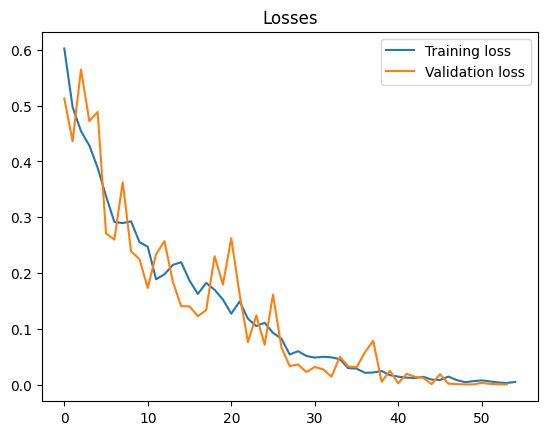

In [42]:
opt.plot_losses()

In [60]:
loaded_dict=torch.load('/content/drive/MyDrive/Omdeena_Deepfake_unzipped/AlexNet/Checkpoints')

In [61]:
model.load_state_dict(loaded_dict)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [63]:
opt=Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
predictions, values = opt.evaluate(test_loader_one)
# https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [64]:
probs=torch.sigmoid(torch.FloatTensor(np.array(predictions)))

In [65]:
probs

tensor([[[9.9994e-01, 5.5383e-05]],

        [[9.3887e-01, 4.0706e-02]],

        [[6.1608e-01, 3.6881e-01]],

        ...,

        [[3.0326e-03, 9.9787e-01]],

        [[9.5274e-01, 3.5625e-02]],

        [[9.9701e-01, 1.9882e-03]]])

In [66]:
preds=np.argmax(probs, axis=2)

In [67]:
preds

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]])

In [70]:
f1=f1_score(values, preds)
accuracy=accuracy_score(values, preds)
recall=recall_score(values, preds)
precision=precision_score(values, preds)
confusion=confusion_matrix(values, preds)

In [71]:
print('f1_score', f1)
print('accuracy_score', accuracy)
print('recall_score', recall)
print('precision_score', precision)

f1_score 0.836607570675611
accuracy_score 0.8295
recall_score 0.873
precision_score 0.8031278748850046


In [75]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

In [73]:
print(classification_report(values, preds))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3000
           1       0.80      0.87      0.84      3000

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000



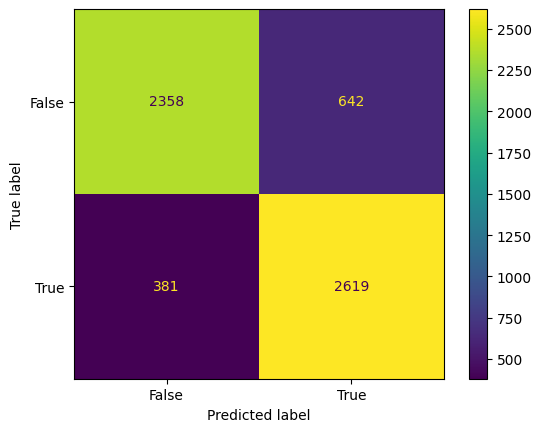

In [76]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
# https://discuss.pytorch.org/t/predict-proba/109730